### Data Analysis Goal
- Practice data cleaning on raw data.<br>
- Analyze the most in-demand job titles or industries in different cities or countries.<br>
- Identify the top companies hiring for specific job positions.<br>
- Utilize the skills data to determine the most sought-after skills in different job categories.<br>
- Build a job recommendation system based on user profiles and job listing data.<br>
- Discover patterns in job types or levels across different industries.<br>
- Identify skill gaps in the job market to inform educational or training programs.<br>
- Explore the relationship between job title and required skills.<br>

https://www.kaggle.com/code/kunchamanjula/linkedin-jobs-and-skills-eda-project-6

In [60]:
import time
import pandas as pd
import matplotlib.pyplot as plt

## Read CSV Data

In [3]:
start = time.time()
job_skill_df = pd.read_csv('data/job_skills.csv')
job_summary_df = pd.read_csv('data/job_summary.csv')
job_post_df = pd.read_csv('data/linkedin_job_postings.csv')
print("Read in",time.time()-start,"sec")

45.70699095726013

Reading all data require about 20s with pandas

## Have a peek of CSV data

In [4]:
job_skill_df.head()

,job_link,job_skills
0,https://www.linkedin.com/jobs/view/housekeeper...,"Building Custodial Services, Cleaning, Janitor..."
1,https://www.linkedin.com/jobs/view/assistant-g...,"Customer service, Restaurant management, Food ..."
2,https://www.linkedin.com/jobs/view/school-base...,"Applied Behavior Analysis (ABA), Data analysis..."
3,https://www.linkedin.com/jobs/view/electrical-...,"Electrical Engineering, Project Controls, Sche..."
4,https://www.linkedin.com/jobs/view/electrical-...,"Electrical Assembly, Point to point wiring, St..."


In [5]:
job_summary_df.head()

,job_link,job_summary
0,https://www.linkedin.com/jobs/view/restaurant-...,Rock N Roll Sushi is hiring a Restaurant Manag...
1,https://www.linkedin.com/jobs/view/med-surg-re...,Schedule\n: PRN is required minimum 12 hours p...
2,https://www.linkedin.com/jobs/view/registered-...,Description\nIntroduction\nAre you looking for...
3,https://uk.linkedin.com/jobs/view/commercial-a...,Commercial account executive\nSheffield\nFull ...
4,https://www.linkedin.com/jobs/view/store-manag...,Address:\nUSA-CT-Newington-44 Fenn Road\nStore...


In [6]:
job_post_df.head()

,job_link,last_processed_time,got_summary,got_ner,is_being_worked,job_title,company,job_location,first_seen,search_city,search_country,search_position,job_level,job_type
0,https://www.linkedin.com/jobs/view/account-exe...,2024-01-21 07:12:29.00256+00,t,t,f,Account Executive - Dispensing (NorCal/Norther...,BD,"San Diego, CA",2024-01-15,Coronado,United States,Color Maker,Mid senior,Onsite
1,https://www.linkedin.com/jobs/view/registered-...,2024-01-21 07:39:58.88137+00,t,t,f,Registered Nurse - RN Care Manager,Trinity Health MI,"Norton Shores, MI",2024-01-14,Grand Haven,United States,Director Nursing Service,Mid senior,Onsite
2,https://www.linkedin.com/jobs/view/restaurant-...,2024-01-21 07:40:00.251126+00,t,t,f,RESTAURANT SUPERVISOR - THE FORKLIFT,Wasatch Adaptive Sports,"Sandy, UT",2024-01-14,Tooele,United States,Stand-In,Mid senior,Onsite
3,https://www.linkedin.com/jobs/view/independent...,2024-01-21 07:40:00.308133+00,t,t,f,Independent Real Estate Agent,Howard Hanna | Rand Realty,"Englewood Cliffs, NJ",2024-01-16,Pinehurst,United States,Real-Estate Clerk,Mid senior,Onsite
4,https://www.linkedin.com/jobs/view/group-unit-...,2024-01-19 09:45:09.215838+00,f,f,f,Group/Unit Supervisor (Systems Support Manager...,"IRS, Office of Chief Counsel","Chamblee, GA",2024-01-17,Gadsden,United States,Supervisor Travel-Information Center,Mid senior,Onsite


In [7]:
len(job_post_df['job_title'].value_counts())

584544

In [8]:
job_post_df['job_title'].value_counts() > 1

job_title
LEAD SALES ASSOCIATE-FT                                                                                     True
Shift Manager                                                                                               True
First Year Tax Professional                                                                                 True
Assistant Manager                                                                                           True
Customer Service Representative                                                                             True
                                                                                                           ...  
Assistant Salon Manager - Villages at Waterville Landing                                                   False
Senior Specialist, Program Scheduler                                                                       False
Retail Store Associate Warehouse Part Time Homesense - Sherwood Park Square           

In [9]:
title = job_post_df['job_title'].value_counts()>1

## See Intersection of Links

In [10]:
job_skill_df.shape

(1296381, 2)

In [11]:
job_summary_df.shape

(1297332, 2)

In [12]:
job_post_df.shape

(1348454, 14)

See how many links do both dataset have

In [13]:
link1 = set(job_skill_df['job_link'])

In [14]:
link2 = set(job_summary_df['job_link'])

In [15]:
link3 = set(job_post_df['job_link'])

In [16]:
link_intersect = link1.intersection(link2).intersection(link3)

In [17]:
len(link_intersect)

1296381

We can see 1296381 intersections thus we say there are at least 1348454-1296381=52073 jobs doesn't have enough information

## Data Overall Info Check

From here we see that the most important and complex set is job_post<br>
Let's see exactly what's inside

In [19]:
job_post_df.info() # we can see there are some null values in [company, job_location] columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1348454 entries, 0 to 1348453
Data columns (total 14 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   job_link             1348454 non-null  object
 1   last_processed_time  1348454 non-null  object
 2   got_summary          1348454 non-null  object
 3   got_ner              1348454 non-null  object
 4   is_being_worked      1348454 non-null  object
 5   job_title            1348454 non-null  object
 6   company              1348443 non-null  object
 7   job_location         1348435 non-null  object
 8   first_seen           1348454 non-null  object
 9   search_city          1348454 non-null  object
 10  search_country       1348454 non-null  object
 11  search_position      1348454 non-null  object
 12  job_level            1348454 non-null  object
 13  job_type             1348454 non-null  object
dtypes: object(14)
memory usage: 144.0+ MB


In [20]:
job_post_df.describe()

,job_link,last_processed_time,got_summary,got_ner,is_being_worked,job_title,company,job_location,first_seen,search_city,search_country,search_position,job_level,job_type
count,1348454,1348454,1348454,1348454,1348454,1348454,1348443,1348435,1348454,1348454,1348454,1348454,1348454,1348454
unique,1348454,722748,2,2,2,584544,90605,29153,6,1018,4,1993,2,3
top,https://www.linkedin.com/jobs/view/account-exe...,2024-01-19 09:45:09.215838+00,t,t,f,LEAD SALES ASSOCIATE-FT,Health eCareers,"New York, NY",2024-01-14,Baytown,United States,Account Executive,Mid senior,Onsite
freq,1,625540,1297877,1296401,1346978,7325,41598,13436,460035,10052,1149342,19468,1204445,1337633


## Data Cleaning

Eventough the data look nice and neet, we still have to filter out some dirty values and pre process. By this we might achieve:
- Less error data
- Efficiency
- Quality
- Consistency

First let's deal with null values:

In [21]:
job_post_df.isnull() # can't see anything. Let's try sum()

,job_link,last_processed_time,got_summary,got_ner,is_being_worked,job_title,company,job_location,first_seen,search_city,search_country,search_position,job_level,job_type
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1348449,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1348450,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1348451,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1348452,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [22]:
job_post_df.isnull().sum() # now we see null values.

job_link                0
last_processed_time     0
got_summary             0
got_ner                 0
is_being_worked         0
job_title               0
company                11
job_location           19
first_seen              0
search_city             0
search_country          0
search_position         0
job_level               0
job_type                0
dtype: int64

By now we should either fill or drop those na values. Since the value is all STRING, there are two ways: <br>
- Make up random companies to fill NA. (Not losing information but might result inaccuracy
- Drop NA row for more accuracy. (Not harm to accuracy but will lose severay information

Here we choose to drop NA rows for accuracy result. Afterall we need to do a search engine and accuracy is our top priority

In [27]:
job_post_df.dropna(inplace=True)

In [28]:
job_post_df.info() # now we see all na rows are gone. Row's counts drops from 1348454 to 1348424

<class 'pandas.core.frame.DataFrame'>
Index: 1348424 entries, 0 to 1348453
Data columns (total 14 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   job_link             1348424 non-null  object
 1   last_processed_time  1348424 non-null  object
 2   got_summary          1348424 non-null  object
 3   got_ner              1348424 non-null  object
 4   is_being_worked      1348424 non-null  object
 5   job_title            1348424 non-null  object
 6   company              1348424 non-null  object
 7   job_location         1348424 non-null  object
 8   first_seen           1348424 non-null  object
 9   search_city          1348424 non-null  object
 10  search_country       1348424 non-null  object
 11  search_position      1348424 non-null  object
 12  job_level            1348424 non-null  object
 13  job_type             1348424 non-null  object
dtypes: object(14)
memory usage: 154.3+ MB


In [31]:
job_post_df.drop_duplicates(inplace=True)
job_post_df.shape # We see that there are no duplicate dataset

(1348424, 14)

In [34]:
job_post_df.nunique()

job_link               1348424
last_processed_time     722737
got_summary                  2
got_ner                      2
is_being_worked              2
job_title               584534
company                  90604
job_location             29153
first_seen                   6
search_city               1018
search_country               4
search_position           1993
job_level                    2
job_type                     3
dtype: int64

## Time Stamp Fix

The original column [last_processed_time] is object type which means it's read as String. We need to cast it as timestamp for further use.

In [36]:
job_post_df.head()

,job_link,last_processed_time,got_summary,got_ner,is_being_worked,job_title,company,job_location,first_seen,search_city,search_country,search_position,job_level,job_type
0,https://www.linkedin.com/jobs/view/account-exe...,2024-01-21 07:12:29.00256+00,t,t,f,Account Executive - Dispensing (NorCal/Norther...,BD,"San Diego, CA",2024-01-15,Coronado,United States,Color Maker,Mid senior,Onsite
1,https://www.linkedin.com/jobs/view/registered-...,2024-01-21 07:39:58.88137+00,t,t,f,Registered Nurse - RN Care Manager,Trinity Health MI,"Norton Shores, MI",2024-01-14,Grand Haven,United States,Director Nursing Service,Mid senior,Onsite
2,https://www.linkedin.com/jobs/view/restaurant-...,2024-01-21 07:40:00.251126+00,t,t,f,RESTAURANT SUPERVISOR - THE FORKLIFT,Wasatch Adaptive Sports,"Sandy, UT",2024-01-14,Tooele,United States,Stand-In,Mid senior,Onsite
3,https://www.linkedin.com/jobs/view/independent...,2024-01-21 07:40:00.308133+00,t,t,f,Independent Real Estate Agent,Howard Hanna | Rand Realty,"Englewood Cliffs, NJ",2024-01-16,Pinehurst,United States,Real-Estate Clerk,Mid senior,Onsite
4,https://www.linkedin.com/jobs/view/group-unit-...,2024-01-19 09:45:09.215838+00,f,f,f,Group/Unit Supervisor (Systems Support Manager...,"IRS, Office of Chief Counsel","Chamblee, GA",2024-01-17,Gadsden,United States,Supervisor Travel-Information Center,Mid senior,Onsite


In [41]:
timestamp = pd.to_datetime(job_post_df['last_processed_time'],dayfirst=True,format='mixed')

In [45]:
job_post_df['date'] = timestamp.dt.date
job_post_df['time'] = timestamp.dt.time

In [48]:
job_post_df.head()

,job_link,got_summary,got_ner,is_being_worked,job_title,company,job_location,first_seen,search_city,search_country,search_position,job_level,job_type,date,time
0,https://www.linkedin.com/jobs/view/account-exe...,t,t,f,Account Executive - Dispensing (NorCal/Norther...,BD,"San Diego, CA",2024-01-15,Coronado,United States,Color Maker,Mid senior,Onsite,2024-01-21,07:12:29.002560
1,https://www.linkedin.com/jobs/view/registered-...,t,t,f,Registered Nurse - RN Care Manager,Trinity Health MI,"Norton Shores, MI",2024-01-14,Grand Haven,United States,Director Nursing Service,Mid senior,Onsite,2024-01-21,07:39:58.881370
2,https://www.linkedin.com/jobs/view/restaurant-...,t,t,f,RESTAURANT SUPERVISOR - THE FORKLIFT,Wasatch Adaptive Sports,"Sandy, UT",2024-01-14,Tooele,United States,Stand-In,Mid senior,Onsite,2024-01-21,07:40:00.251126
3,https://www.linkedin.com/jobs/view/independent...,t,t,f,Independent Real Estate Agent,Howard Hanna | Rand Realty,"Englewood Cliffs, NJ",2024-01-16,Pinehurst,United States,Real-Estate Clerk,Mid senior,Onsite,2024-01-21,07:40:00.308133
4,https://www.linkedin.com/jobs/view/group-unit-...,f,f,f,Group/Unit Supervisor (Systems Support Manager...,"IRS, Office of Chief Counsel","Chamblee, GA",2024-01-17,Gadsden,United States,Supervisor Travel-Information Center,Mid senior,Onsite,2024-01-19,09:45:09.215838


In [47]:
del job_post_df['last_processed_time']

## EAD and Visualization

#### Let's see top 20 job titles

In [51]:
top_title = job_post_df['job_title'].value_counts().head(20) 
top_title # This is not accurate because a same title can be variate due to different letter

job_title
LEAD SALES ASSOCIATE-FT                                7325
Shift Manager                                          5818
First Year Tax Professional                            5356
Assistant Manager                                      5346
Customer Service Representative                        5203
LEAD SALES ASSOCIATE-PT                                4924
Store Manager                                          4791
CUSTOMER SERVICE REPRESENTATIVE                        4218
Registered Nurse                                       4190
Hourly Supervisor & Training                           2955
Travel Allied Health Professional - CT Technologist    2933
Host                                                   2871
Account Executive                                      2631
Senior Accountant                                      2548
Restaurant Manager                                     2335
Hourly Supervisor and Training                         2230
Veterinarian                  

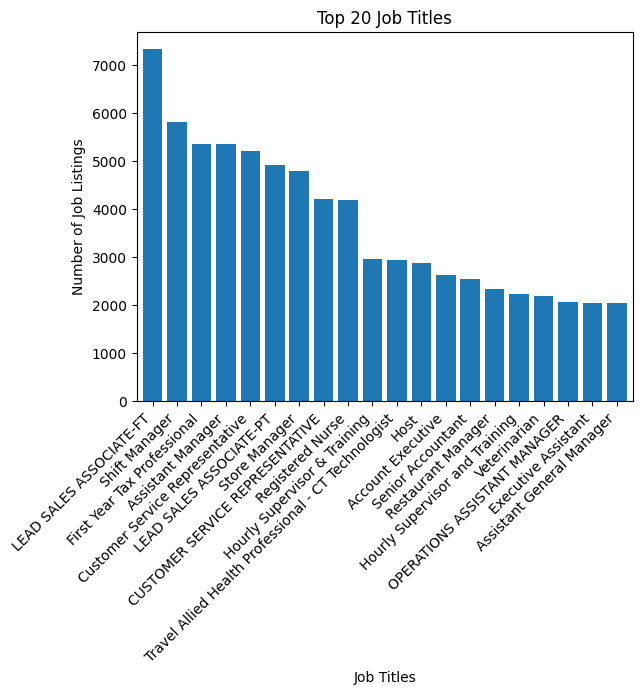

<Figure size 800x1000 with 0 Axes>

In [67]:
top_title.plot(kind='bar',width=0.8)
plt.title('Top 20 Job Titles')
plt.xlabel('Job Titles')
plt.ylabel('Number of Job Listings')
plt.xticks(rotation=45, ha='right')
plt.figure(figsize=(8, 10))
plt.show()

#### Top country of These Companies From

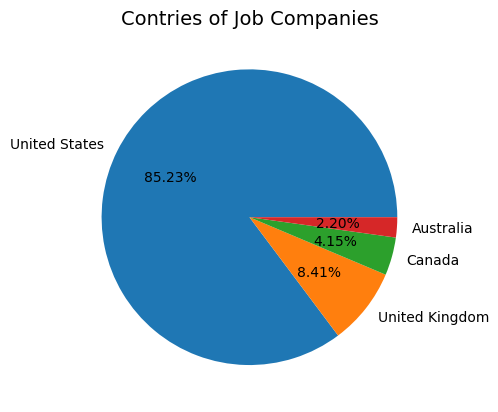

In [69]:
countries = job_post_df["search_country"].value_counts()

plt.pie(x=countries,labels=countries.index,autopct="%1.2f%%")
plt.title("Contries of Job Companies",fontsize=14)
plt.show() # We can see most of the companies from US. Three continents: North america, Australia or Europe

#### Which Job Skill are Most Needed in Overall Perspective

In [71]:
job_skill_df.head()

,job_link,job_skills
0,https://www.linkedin.com/jobs/view/housekeeper...,"Building Custodial Services, Cleaning, Janitor..."
1,https://www.linkedin.com/jobs/view/assistant-g...,"Customer service, Restaurant management, Food ..."
2,https://www.linkedin.com/jobs/view/school-base...,"Applied Behavior Analysis (ABA), Data analysis..."
3,https://www.linkedin.com/jobs/view/electrical-...,"Electrical Engineering, Project Controls, Sche..."
4,https://www.linkedin.com/jobs/view/electrical-...,"Electrical Assembly, Point to point wiring, St..."


In [84]:
skills = job_skill_df['job_skills'].str.lower().str.split(', ').explode()# into a series
skills = skills.value_counts()

In [85]:
top_skills = skills.head(10)
top_skills # if we didn't lowercase, there will be some duplicate values

job_skills
communication           370143
customer service        278102
teamwork                227609
communication skills    195949
leadership              185187
problem solving         149032
time management         142911
attention to detail     133975
problemsolving          129329
project management      121563
Name: count, dtype: int64

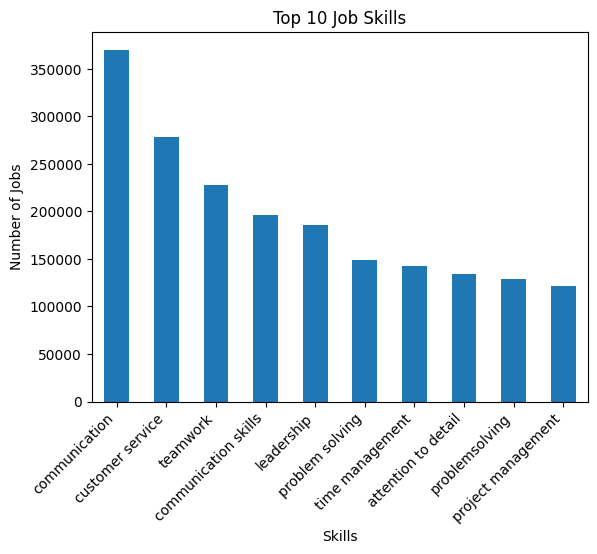

<Figure size 800x1000 with 0 Axes>

In [86]:
top_skills.plot(kind='bar')
plt.title('Top 10 Job Skills')
plt.xlabel('Skills')
plt.ylabel('Number of Jobs')
plt.xticks(rotation=45, ha='right')
plt.figure(figsize=(8, 10))
plt.show()

#### Find Top 10 skills within Top 5 Job Title

In [87]:
job_skill_df.head()

,job_link,job_skills
0,https://www.linkedin.com/jobs/view/housekeeper...,"Building Custodial Services, Cleaning, Janitor..."
1,https://www.linkedin.com/jobs/view/assistant-g...,"Customer service, Restaurant management, Food ..."
2,https://www.linkedin.com/jobs/view/school-base...,"Applied Behavior Analysis (ABA), Data analysis..."
3,https://www.linkedin.com/jobs/view/electrical-...,"Electrical Engineering, Project Controls, Sche..."
4,https://www.linkedin.com/jobs/view/electrical-...,"Electrical Assembly, Point to point wiring, St..."


In [88]:
job_post_df.head()

,job_link,got_summary,got_ner,is_being_worked,job_title,company,job_location,first_seen,search_city,search_country,search_position,job_level,job_type,date,time
0,https://www.linkedin.com/jobs/view/account-exe...,t,t,f,Account Executive - Dispensing (NorCal/Norther...,BD,"San Diego, CA",2024-01-15,Coronado,United States,Color Maker,Mid senior,Onsite,2024-01-21,07:12:29.002560
1,https://www.linkedin.com/jobs/view/registered-...,t,t,f,Registered Nurse - RN Care Manager,Trinity Health MI,"Norton Shores, MI",2024-01-14,Grand Haven,United States,Director Nursing Service,Mid senior,Onsite,2024-01-21,07:39:58.881370
2,https://www.linkedin.com/jobs/view/restaurant-...,t,t,f,RESTAURANT SUPERVISOR - THE FORKLIFT,Wasatch Adaptive Sports,"Sandy, UT",2024-01-14,Tooele,United States,Stand-In,Mid senior,Onsite,2024-01-21,07:40:00.251126
3,https://www.linkedin.com/jobs/view/independent...,t,t,f,Independent Real Estate Agent,Howard Hanna | Rand Realty,"Englewood Cliffs, NJ",2024-01-16,Pinehurst,United States,Real-Estate Clerk,Mid senior,Onsite,2024-01-21,07:40:00.308133
4,https://www.linkedin.com/jobs/view/group-unit-...,f,f,f,Group/Unit Supervisor (Systems Support Manager...,"IRS, Office of Chief Counsel","Chamblee, GA",2024-01-17,Gadsden,United States,Supervisor Travel-Information Center,Mid senior,Onsite,2024-01-19,09:45:09.215838


In [90]:
job_merge = job_skill_df.merge(job_post_df,on='job_link') # merge on link and drop all rows have NA

In [91]:
top_titles = job_merge['job_title'].value_counts().nlargest(10).index

top_skills_by_title = {}
for title in top_titles:
    subset = job_merge[job_merge['job_title'] == title]
    
    skills = subset['job_skills'].str.split(', ').explode()
    top_skills = skills.value_counts().nlargest(10)
    
    top_skills_by_title[title] = top_skills

In [92]:
# Display the results
for title, skills in top_skills_by_title.items():
    print(f"Top 10 Skills for {title}:")
    print(skills)
    print("\n")

Top 10 Skills for LEAD SALES ASSOCIATE-FT:
job_skills
Customer service             6530
Supervisory experience       6176
Mathematical calculations    5372
Driving                      4652
High school diploma          4562
Cash handling                4432
Cash register operation      4183
Fastpaced environment        3991
Cleaning                     3350
Merchandising                3236
Name: count, dtype: int64


Top 10 Skills for Shift Manager:
job_skills
Training                        4410
Scheduling                      3816
Leadership                      3499
Food Safety                     3353
Inventory Management            3254
Internal Communication          2455
Quality Food Production         2451
Safety and Security             2132
Exceptional Customer Service    2126
Communication                   1979
Name: count, dtype: int64


Top 10 Skills for First Year Tax Professional:
job_skills
Teamwork                        4546
Sales                           4141
Mark